In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix_titles.csv


In [93]:
import pandas as pd
df = pd.read_csv("../input/netflix_titles.csv")

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf


In [95]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [96]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [97]:
df["date_added"]= pd.to_datetime(df["date_added"])
df['year_added']=df["date_added"].dt.year
df['month_added']=df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0


In [98]:
df['season_count']=df.apply(lambda x:x['duration'].split(" ")[0] if 'Season'  in x['duration'] else "",axis=1) #apply to each column
df['duration']=df.apply(lambda x:x['duration'].split(" ")[0] if 'Season' not in x['duration'] else "", axis=1)
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


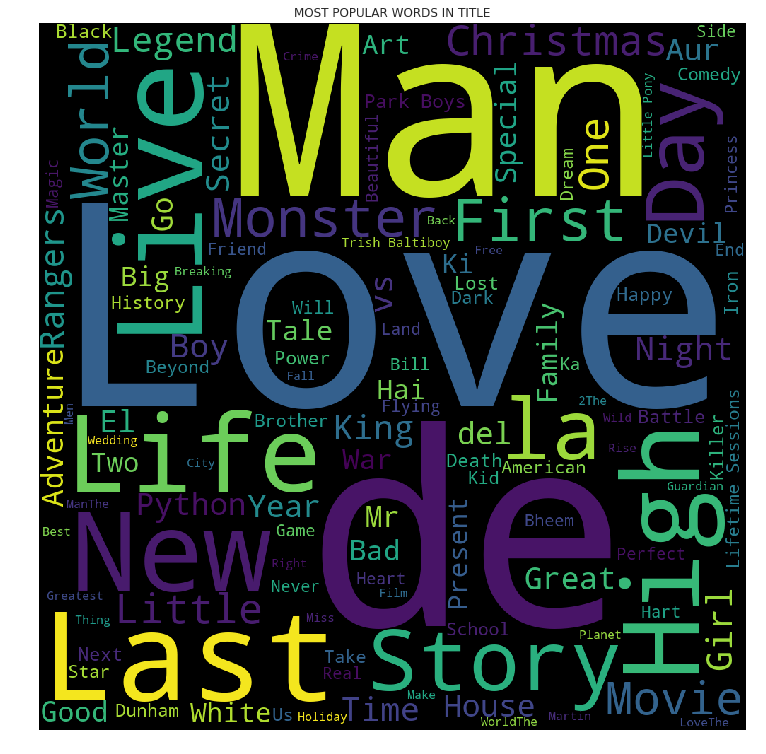

In [99]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
plt.rcParams['figure.figsize']=(13,13)
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black',width=1000,height=1000,max_words=121).generate(''.join(df['title']))
#Wordcloud function is used to make the cloud, remove stopwords and generate from df{title}
plt.imshow(wordcloud)
plt.axis('off')
plt.title('MOST POPULAR WORDS IN TITLE')
plt.show()

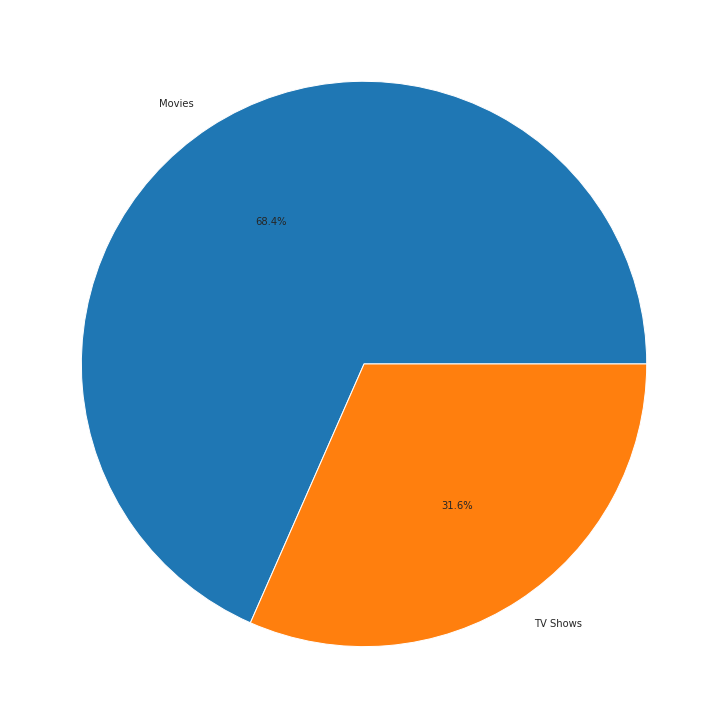

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [100]:
import plotly.express as px
#x=count(df['type'] if df[type]==)
sr=pd.Series(df['type'])
x=sr.value_counts()
labels = 'Movies','TV Shows'
fig1, ax1 = plt.subplots()
ax1.pie(x,labels=labels,autopct='%1.1f%%')
plt.show()
x

In [101]:
new_df=df[['title','director','cast','listed_in','description']]
new_df.head()
new_df.shape

(6234, 5)

In [102]:
!pip install rake-nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
new_df.dropna(inplace=True)
new_df.shape
blanks=[]
col=['title','director','cast','listed_in','description']
for i,col in new_df.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)  
new_df.shape            

(3909, 5)

In [104]:

new_df.drop(blanks, inplace=True)
new_df.shape   

(3909, 5)

In [105]:
new_df['Keywords']=''
for index, row in new_df.iterrows():
    description = row['description']
    r= Rake()
    r.extract_keywords_from_text(description)
    key_words_dict_scores = r.get_word_degrees()
    row['Keywords']=list(key_words_dict_scores.keys())
new_df.drop(columns=['description'],inplace=True)
new_df.head()

,title,director,cast,listed_in,Keywords
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies","[grandfather, stolen, artifact, polar, bear, k..."
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,"[interest, social, media, celebrity, longtime,..."
6,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","International Movies, Sci-Fi & Fantasy, Thrillers","[violating, protocol, tech, company, investiga..."
7,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Stand-Up Comedy,"[stand, set, next, level, sperm, banks, family..."
9,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","Action & Adventure, Thrillers","[recently, murdered, apartment, find, neighbor..."


In [106]:
new_df['cast']=new_df['cast'].map(lambda x: x.split(',')[:3])
new_df['listed_in']=new_df['listed_in'].map(lambda x : x.lower().split(','))
new_df['director']=new_df['director'].map(lambda x: x.split(' '))
for index , row in new_df.iterrows():
    row['cast']=[x.lower().replace(' ','') for x in row['cast']]
    row['director']="".join(row['director']).lower()
    
    

In [107]:
new_df.set_index('title', inplace = True)
new_df.head()

,director,cast,listed_in,Keywords
title,,,,
Norm of the North: King Sized Adventure,"richardfinn,timmaltby","[alanmarriott, andrewtoth, briandobson]","[children & family movies, comedies]","[grandfather, stolen, artifact, polar, bear, k..."
#realityhigh,fernandolebrija,"[nestacooper, katewalsh, johnmichaelhiggins]",[comedies],"[interest, social, media, celebrity, longtime,..."
Automata,gabeibáñez,"[antoniobanderas, dylanmcdermott, melaniegriff...","[international movies, sci-fi & fantasy, thr...","[violating, protocol, tech, company, investiga..."
Fabrizio Copano: Solo pienso en mi,"rodrigotoro,franciscoschultz",[fabriziocopano],[stand-up comedy],"[stand, set, next, level, sperm, banks, family..."
Good People,henrikrubengenz,"[jamesfranco, katehudson, tomwilkinson]","[action & adventure, thrillers]","[recently, murdered, apartment, find, neighbor..."


In [113]:
new_df['bag_of_words'] = ''
columns = new_df.columns
columns

Index(['director', 'cast', 'listed_in', 'Keywords', 'bag_of_words'], dtype='object')

In [114]:
new_df['bag_of_words']=''
columns=new_df.columns
for index, row in new_df.iterrows():
    words=''
    for col in columns:
        if col!='director':
            words=words+" ".join(row[col])+' '
        else:
            words=words+ row[col]+' '
            
    row['bag_of_words']=words


new_df.drop(columns=[col for col in  new_df.columns if col!= 'bag_of_words'],inplace=True)


In [115]:
new_df.head()

,bag_of_words
title,
Norm of the North: King Sized Adventure,"richardfinn,timmaltby alanmarriott andrewtoth ..."
#realityhigh,fernandolebrija nestacooper katewalsh johnmich...
Automata,gabeibáñez antoniobanderas dylanmcdermott mela...
Fabrizio Copano: Solo pienso en mi,"rodrigotoro,franciscoschultz fabriziocopano st..."
Good People,henrikrubengenz jamesfranco katehudson tomwilk...


In [119]:
count=CountVectorizer()
count_matrix= count.fit_transform(new_df['bag_of_words'])
print(count_matrix)

  (0, 17380)	1
  (0, 20897)	1
  (0, 700)	1
  (0, 1233)	1
  (0, 2979)	1
  (0, 3861)	1
  (0, 7116)	1
  (0, 14166)	1
  (0, 4345)	1
  (0, 8278)	1
  (0, 19880)	1
  (0, 1700)	1
  (0, 16020)	1
  (0, 2258)	1
  (0, 11520)	1
  (0, 14244)	1
  (0, 20397)	1
  (0, 2051)	1
  (0, 1990)	1
  (0, 22247)	1
  (0, 15954)	1
  (0, 6894)	1
  (0, 1569)	1
  (0, 7389)	1
  (1, 4345)	1
  :	:
  (3907, 22271)	1
  (3908, 4345)	1
  (3908, 9676)	1
  (3908, 17727)	1
  (3908, 22677)	1
  (3908, 21523)	1
  (3908, 20973)	1
  (3908, 3026)	1
  (3908, 12147)	1
  (3908, 21389)	3
  (3908, 18995)	2
  (3908, 5570)	1
  (3908, 21377)	1
  (3908, 11878)	1
  (3908, 22816)	1
  (3908, 5575)	1
  (3908, 13447)	1
  (3908, 17127)	1
  (3908, 858)	1
  (3908, 15071)	1
  (3908, 18673)	1
  (3908, 12120)	1
  (3908, 4535)	1
  (3908, 13376)	1
  (3908, 14556)	1


In [131]:
indices=pd.Series(new_df.index)
indices[:5]
idx = indices[indices == 'Automata'].index[0]
print(idx)


2


In [122]:
cosine_sim=cosine_similarity(count_matrix,count_matrix)
cosine_sim

array([[1.        , 0.04454354, 0.04166667, ..., 0.        , 0.        ,
        0.03450328],
       [0.04454354, 1.        , 0.        , ..., 0.        , 0.03253   ,
        0.03688556],
       [0.04166667, 0.        , 1.        , ..., 0.03311331, 0.03042903,
        0.03450328],
       ...,
       [0.        , 0.        , 0.03311331, ..., 1.        , 0.31437304,
        0.38388595],
       [0.        , 0.03253   , 0.03042903, ..., 0.31437304, 1.        ,
        0.32756921],
       [0.03450328, 0.03688556, 0.03450328, ..., 0.38388595, 0.32756921,
        1.        ]])

In [132]:
def recommendations(Title, cosine_sim=cosine_sim):
    recommended_movies=[]
    idx=indices[indices==Title].index[0]
    score_series=pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    top_10_indexes=list(score_series.iloc[1:11].index)
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
    return recommended_movies

    

In [ ]:
recommendations('Rocky')